basic simulation: run and plot the tutorial 3 project

In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

set up the supporting CBM-CFS3 tools

In [8]:
import cbm3_python_helper
cbm3_python_helper.load_cbm3_python()
import cbm3_python.simulation.projectsimulator
from cbm3_python.cbm3data.accessdb import AccessDB

In [9]:
toolbox_path = r'C:\Program Files (x86)\Operational-Scale CBM-CFS3'
project_db_path = os.path.join(toolbox_path, "Tutorials", "Tutorial 3", "Tutorial3.mdb")
results_db_path = os.path.join(toolbox_path, "Tutorials", "Tutorial 3","Tutorial3_results.mdb")

results_db_path = cbm3_python.simulation.projectsimulator.run(
    aidb_path=os.path.join(toolbox_path, "admin", "dbs", "ArchiveIndex_Beta_Install.mdb"), 
    project_path=project_db_path, 
    toolbox_installation_dir=toolbox_path,
    cbm_exe_path=os.path.join(toolbox_path, "admin", "executables"),
    results_database_path= results_db_path)

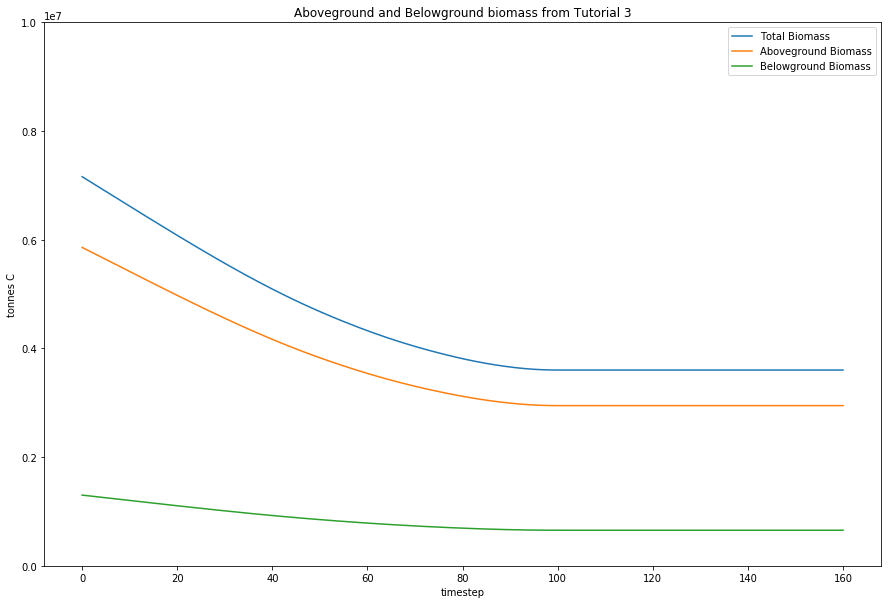

In [10]:
with AccessDB(results_db_path) as results_db:
    rows = results_db.Query("""
        select tpi.TimeStep,
        sum(tpi.SW_Merch + tpi.SW_Foliage + tpi.SW_Other +
            tpi.HW_Merch + tpi.HW_Foliage + tpi.HW_Other) as ag_bio,
        sum(tpi.SW_Coarse + tpi.SW_Fine + tpi.HW_Coarse + tpi.HW_Fine) as bg_bio
        from tblPoolIndicators tpi
        group by tpi.TimeStep
        order by tpi.TimeStep""")
    #create a n-timestep by 3 column array, columnss are timestep, ag-bio, bg-bio
    np_rows = np.array(list(rows))

    plt.figure(figsize=(15,10))
    
    plt.plot(np_rows[:,0],np_rows[:,1]+np_rows[:,2])
    plt.plot(np_rows[:,0],np_rows[:,1]) 
    plt.plot(np_rows[:,0],np_rows[:,2])
    plt.ylim(0,10000000)
    plt.title("Aboveground and Belowground biomass from Tutorial 3")
    plt.ylabel("tonnes C")
    plt.xlabel("timestep")
    plt.legend(["Total Biomass", "Aboveground Biomass", "Belowground Biomass"], loc='upper right')
    plt.show()
    